# HW4

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate, integrate
from scipy.integrate import solve_ivp, odeint

a=0.5
b=0.3
N = 1000000
S0 = 990000
I0 = 7000
R0 = 3000
time = (0, 25)

[9.90000000e+05 9.77899457e+05 8.64737528e+05 5.90662989e+05
 3.34329364e+05 1.60585583e+05 6.86847021e+04 2.71026239e+04
 1.03765168e+04 3.93521980e+03 1.48819273e+03 5.62347570e+02
 2.12463056e+02 8.02746150e+01 3.03325014e+01 1.14622976e+01
 4.33172502e+00 3.72758932e+00] [  7000.          19004.45601516 126657.90594144 343982.74091408
 458132.04574689 431844.14347177 328787.93878001 218604.05362813
 134940.97903465  80031.41263859  46395.28922298  26527.82981548
  15037.16959274   8476.22668134   4760.43078924   2667.06325133
   1491.81078387   1363.82248536] [  3000.           3096.08746519   8604.5660969   65354.26996221
 207538.59063953 407570.27367653 602527.35909617 754293.32244065
 854682.50420872 916033.36756203 952116.51804375 972909.82261501
 984750.36735157 991443.4987037  995209.2367094  997321.47445104
 998503.85749111 998632.44992532]


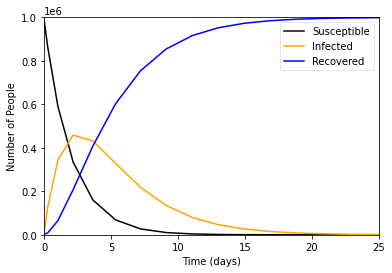

In [5]:
y0 = [S0, I0, R0]


def func(t, y, a, b):
    # S, I, R values assigned from vector
    S,I,R = y
    # differential equations
    dSdt = -a * S
    dIdt = a * S - b * I
    dRdt = b * I
    return dSdt, dIdt, dRdt


values = solve_ivp(func, time, y0, args=(a, b))

S, I, R = values.y[0], values.y[1], values.y[2]

print(S, I, R)

fig = plt.figure()
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(values.t, S, 'black', lw=1.5, label='Susceptible')
ax.plot(values.t, I, 'orange', lw=1.5, label='Infected')
ax.plot(values.t, R, 'blue', lw=1.5, label='Recovered')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Number of People')
ax.set_ylim(0,1000000)
ax.set_xlim(0,25)
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.show()

# HW5

Необходимо методом наименьших квадратов:

для набора данных графика функции S(t)S(t) получить уравнение вида S(t)=S_0e^{-\alpha t}S(t)=S 
0
​
 e 
−αt
 
для набора данных графика функции I(t)I(t) получить уравнение вида I(t)=(I_0+\alpha S_0t)e^{-\alpha t}I(t)=(I 
0
​
 +αS 
0
​
 t)e 
−αt
 
Для уравнения R(t)R(t) график функции будет R(t) = N - S(t) - I(t)R(t)=N−S(t)−I(t)

Построить все три графика S(t)S(t), I(t)I(t) и R(t)R(t) на одной области отображения полученные методом наименьших квадратов

Найти время t_{max}t 
max
​
  при котором число инфекционных индивидов максимально. Надо с помощью метода minimize_scalar найти когда функция I(t)I(t) достигает своего максимума.

In [18]:
from scipy.optimize import leastsq


# S(t) = S0 * coef ** (-a*t)
time2 = np.linspace(0, 25, 18)
S = values.y[0]

def funcS(t, coef):
  return S0 * pow(coef,(-a*t))

def diffS(coef, S, t):
    return S - funcS(t, coef)

coef0 = 1    
aprxS, _ = leastsq(diffS, coef0, args=(S, time2))

aprxS


array([1.44149784])

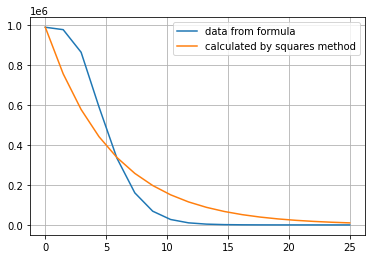

In [17]:
S_p = S0 * pow(aprx[0],(-a*time2))
plt.grid()
plt.plot(time2, S, label='S data from formula')
plt.plot(time2, S_p, label='S calculated by squares method')
plt.legend()

In [21]:
# I(t) = (I0 + a*S0*t) * coef ** (-a*t)

time2 = np.linspace(0, 25, 18)
S = values.y[0]
I = values.y[1]
R = values.y[2]

def funcI(t, coef):
  return (I0 + a*S0*t) * pow(coef,(-a*t))

def diffI(coef, I, t):
    return I - funcI(t, coef)

coef0 = 1    
aprxI, _ = leastsq(diffI, coef0, args=(S, time2))

aprxI

array([1.98568302])

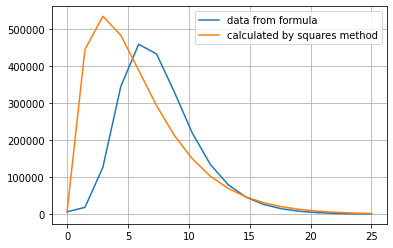

In [22]:
I_p = (I0 + a*S0*time2) * pow(aprxI,(-a*time2))
plt.grid()
plt.plot(time2, I, label='I data from formula')
plt.plot(time2, I_p, label='I calculated by squares method')
plt.legend()

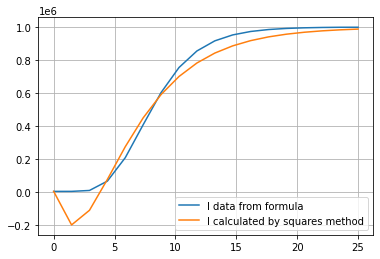

In [23]:
R_p = N - S_p - I_p
plt.grid()
plt.plot(time2, R, label='R data from formula')
plt.plot(time2, R_p, label='R calculated by squares method')
plt.legend()

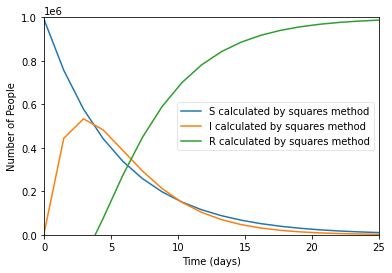

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(time2, S_p, label='S calculated by squares method')
ax.plot(time2, I_p, label='I calculated by squares method')
ax.plot(time2, R_p, label='R calculated by squares method')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Number of People')
ax.set_ylim(0,1000000)
ax.set_xlim(0,25)
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.show()

TypeError: ignored

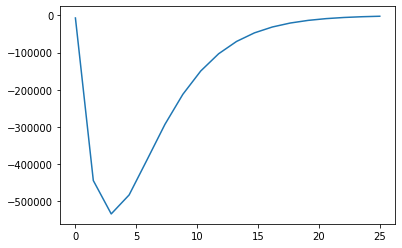

In [37]:
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar
import numpy as np

I_p_reversed = - I_p
plt.plot(time2, I_p_reversed, label='I calculated by squares method')
result = minimize_scalar(I_p_reversed, bounds= (1, 5), method='Bounded')